In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
sns.set_style('darkgrid')

In [39]:
df = pd.read_csv('./data/diamonds.csv')

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [42]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
df.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [44]:
df.shape

(53940, 10)

In [45]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Categorical Engineering

In [62]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

## Data Cleaning

In [65]:
sample = df.sample(3000, random_state=42)
# getting a smaller sample of the data for plotting purposes

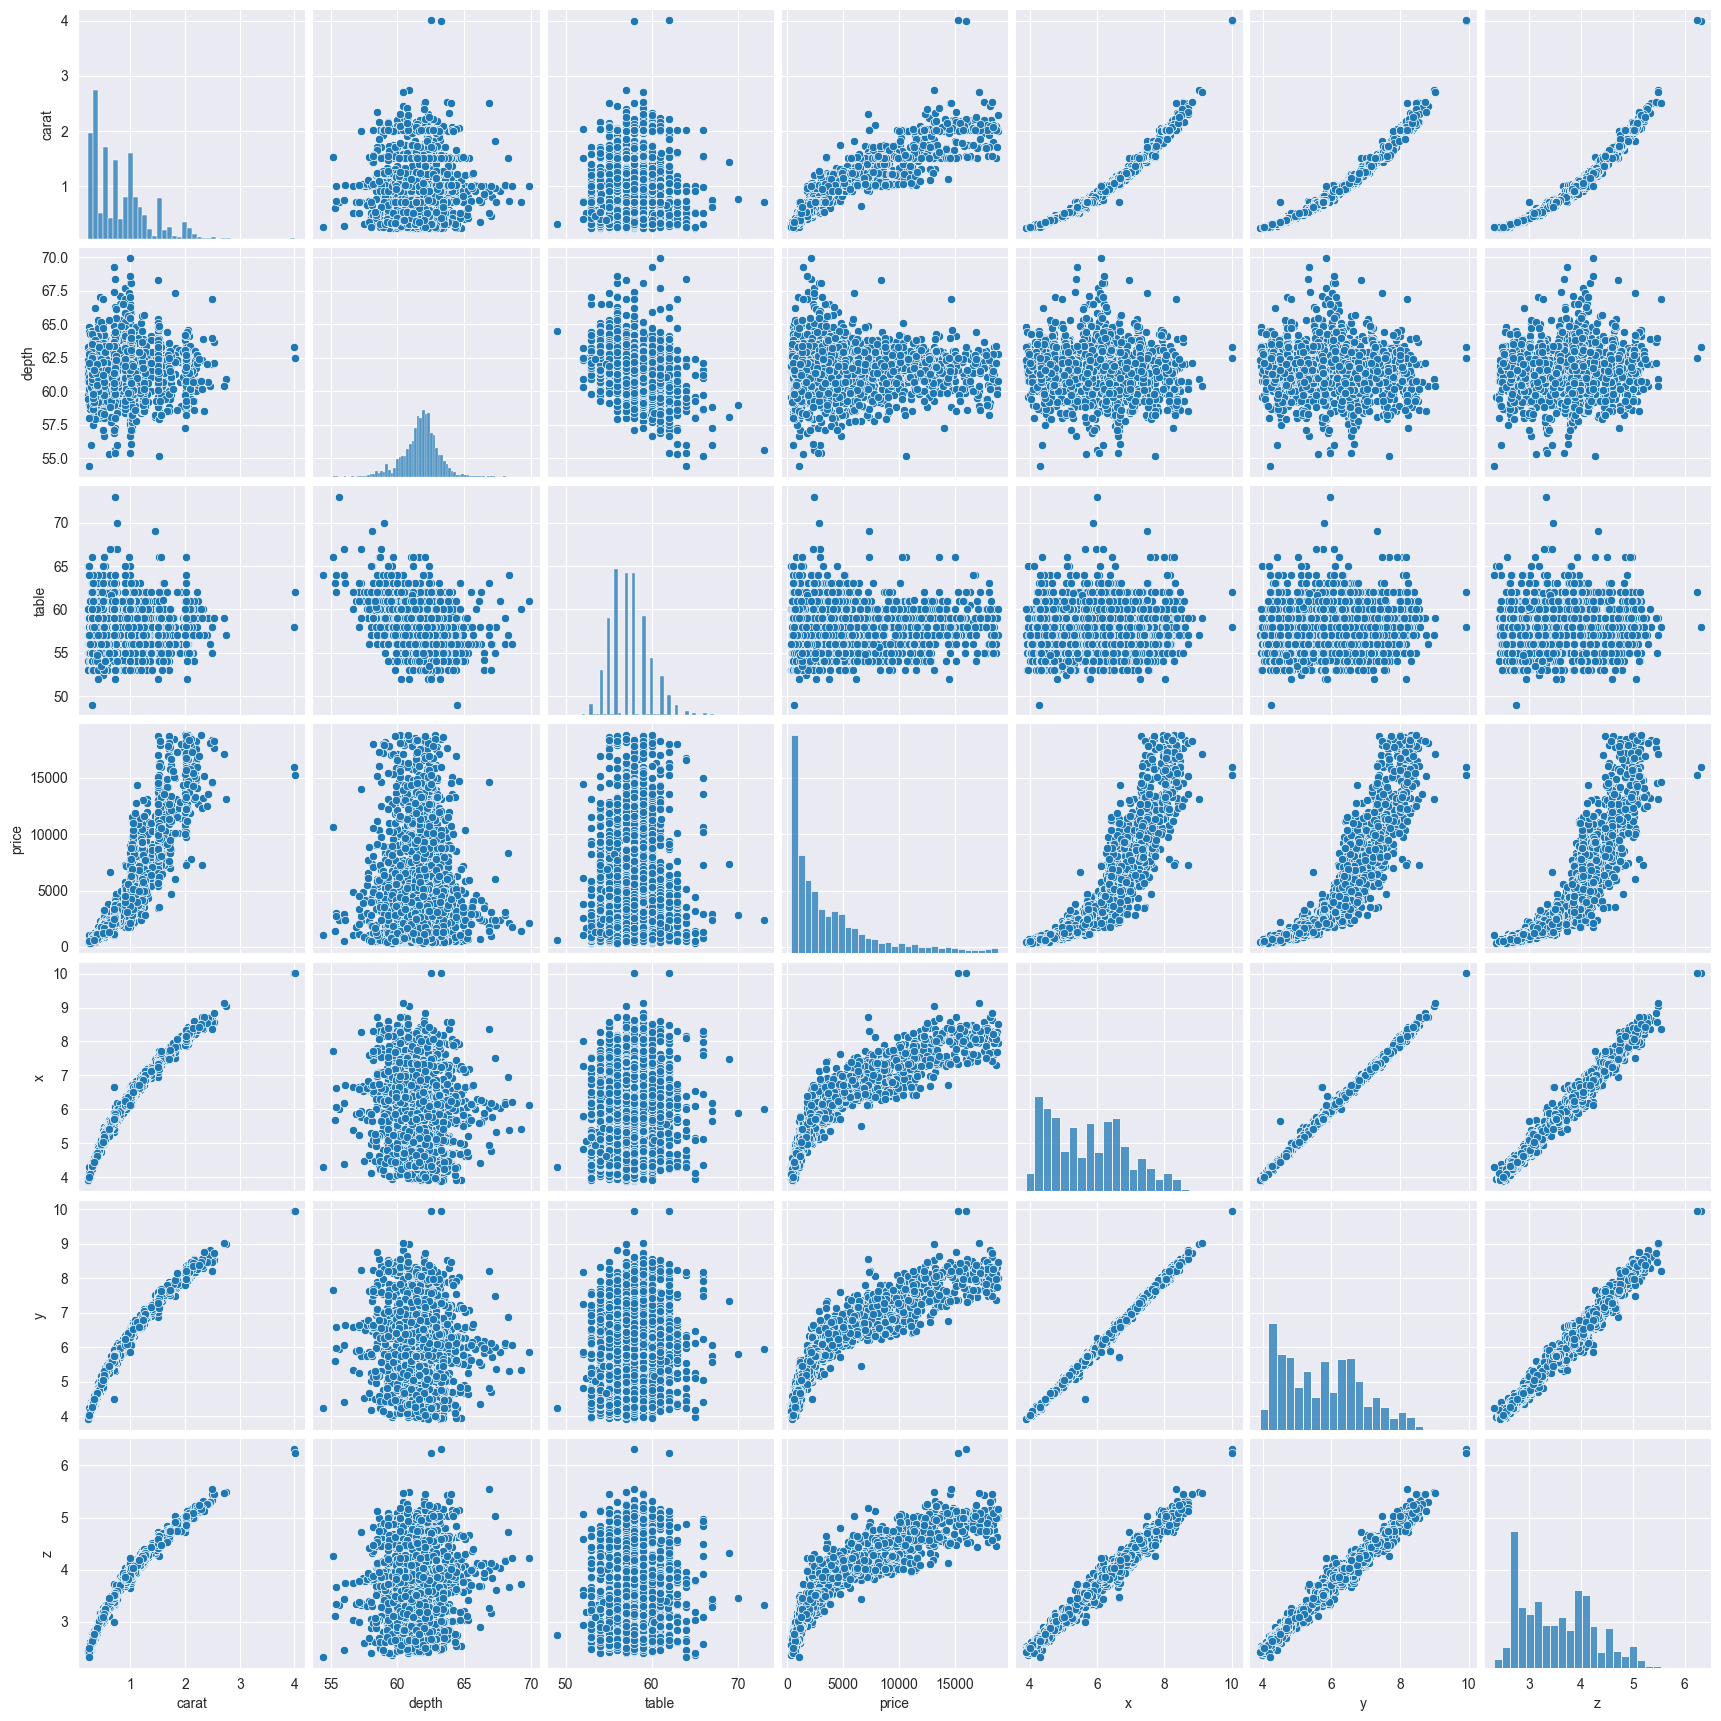

In [47]:
sns.pairplot(data=sample)

> Looks like there are alot of outliers in the `price` column. Let's look at that with and without outliers.

<Axes: xlabel='price'>

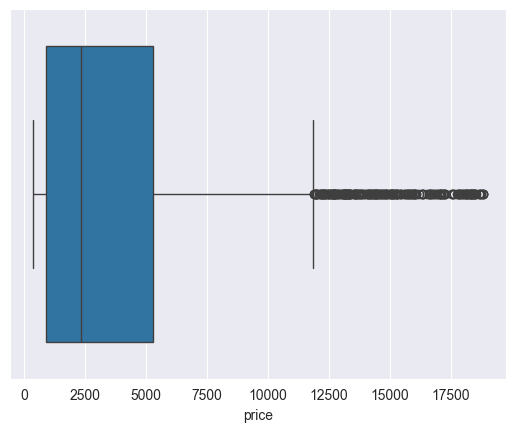

In [48]:
sns.boxplot(data=sample, x='price')

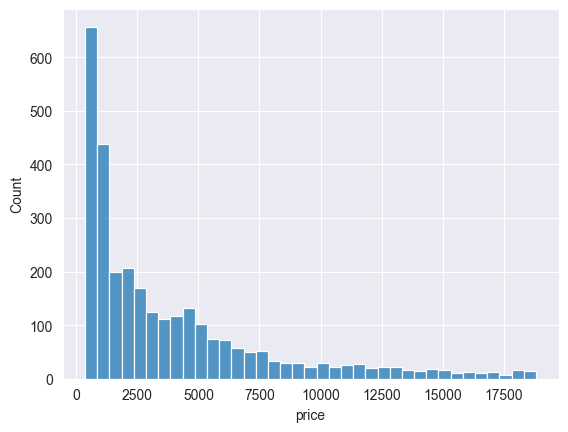

In [49]:
ax = sns.histplot(data=sample, x='price', binwidth=500)

In [50]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return column[(column > lower_bound) & (column < upper_bound)]

In [51]:
prices = sample['price']

In [52]:
new_prices = remove_outliers(prices)

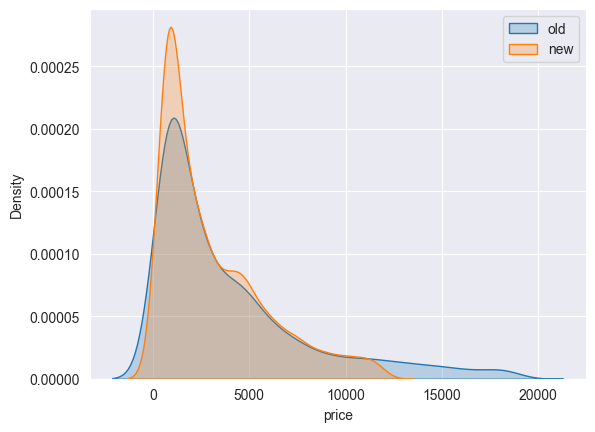

In [53]:
sns.kdeplot(data=prices, label='old', fill=True)
sns.kdeplot(data=new_prices, label='new', fill=True)
plt.legend()

<Axes: xlabel='price'>

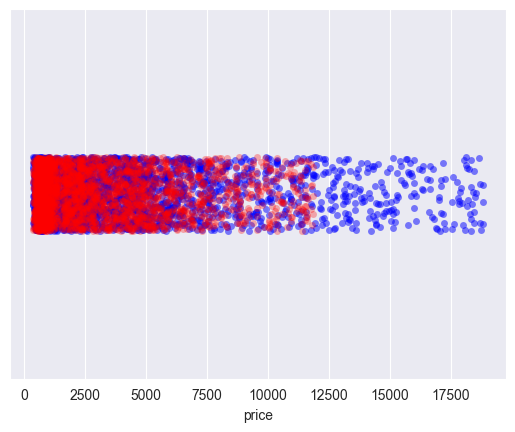

In [54]:
sns.stripplot(x=prices, alpha=0.5, color='blue')
sns.stripplot(x=new_prices, alpha=0.3, color='red')

## Exploratory Data Analysis

### Questions
- How do carat and price relate to each other by cut?
- How do x, y, and z relate to each other?
- How does the price differ by clarity?
- 

### How do carat and price relate to each other by cut?

<Axes: xlabel='carat', ylabel='price'>

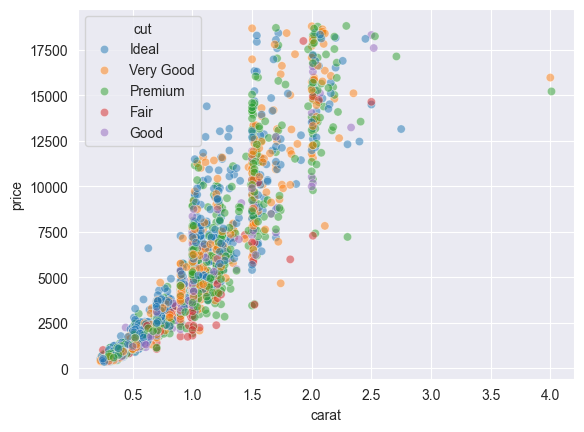

In [55]:
sns.scatterplot(data=sample, x='carat', y='price', hue='cut', alpha=0.5)

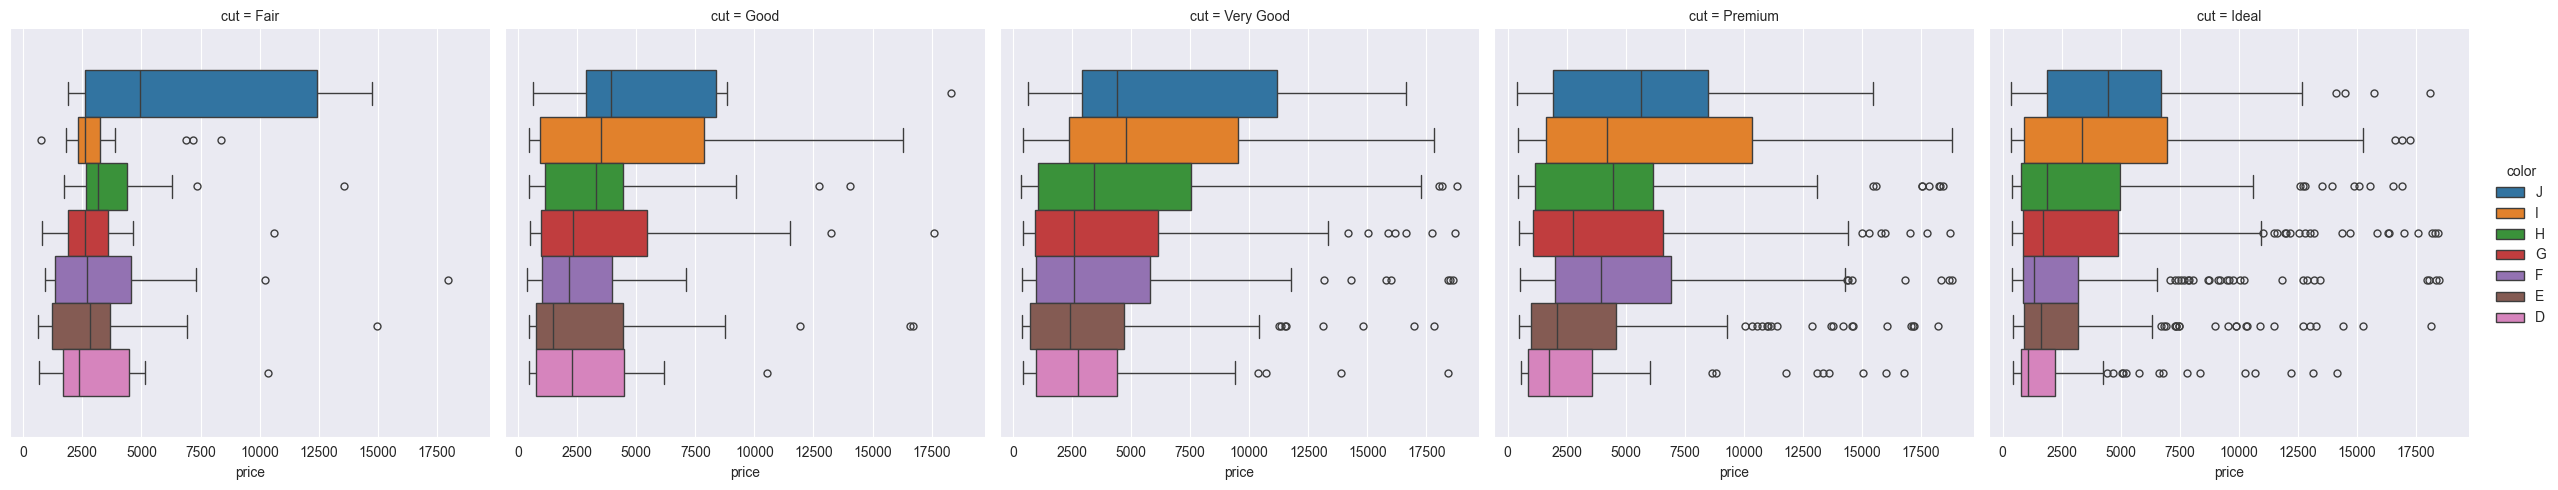

In [74]:
sns.catplot(data=sample, x='price', hue='color', kind='box', col='cut')

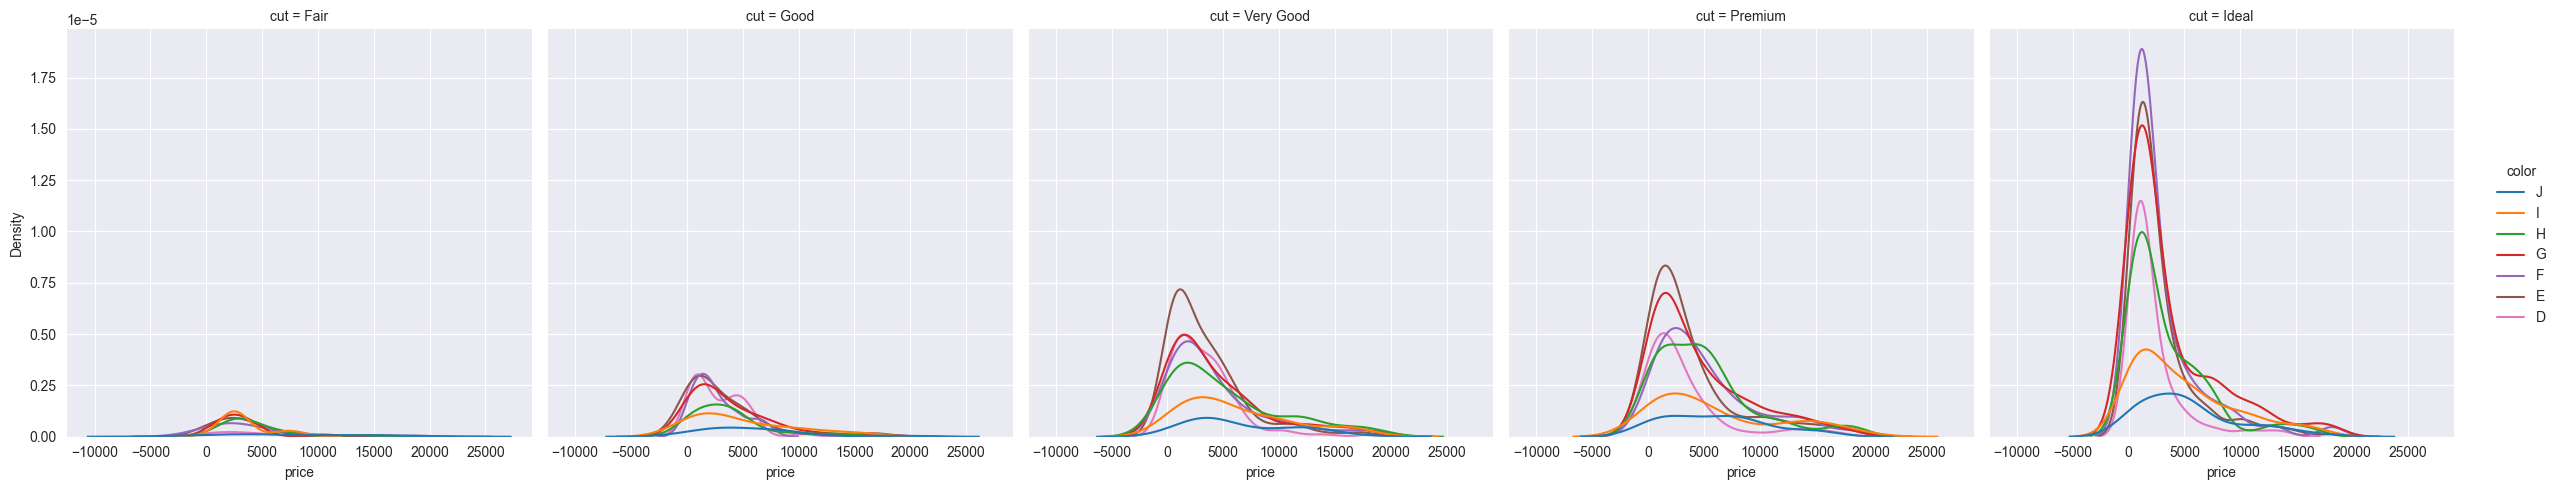

In [76]:
sns.displot(data=sample, x='price', hue='color', kind='kde', col='cut', fill=False)

### How do x, y, and z relate to each other?

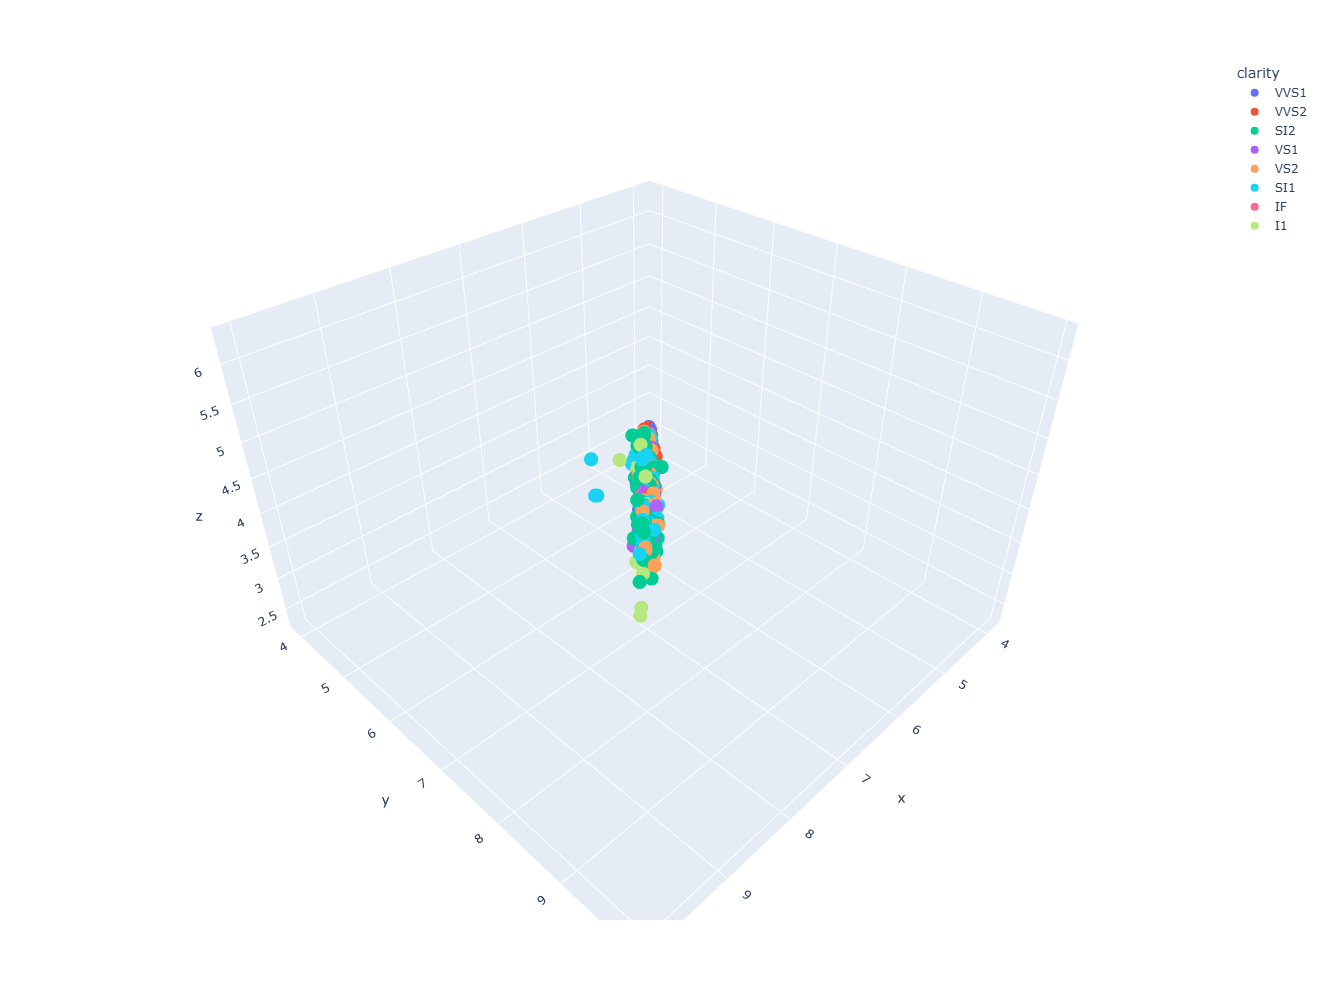

<Figure size 1600x1600 with 0 Axes>

In [57]:
plt.figure(figsize=(16, 16))
fig = px.scatter_3d(
    sample,
    x='x',
    y='y',
    z='z',
    color='clarity'
)
fig.update_layout(
    width=1000,
    height=1000
)

fig.show()


### How does the price distribution differ by clarity?

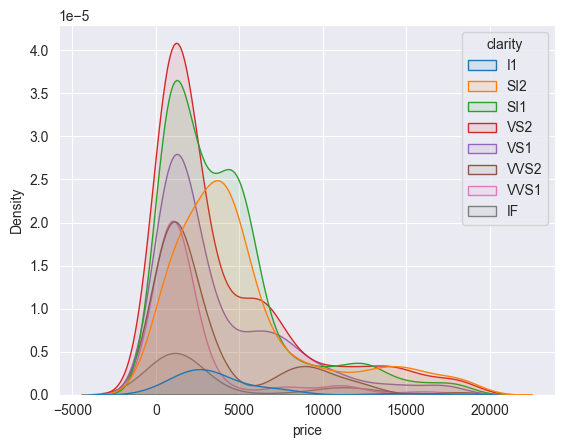

In [67]:
sns.kdeplot(data=sample, x='price', hue='clarity', fill=True, alpha=0.1)
plt.savefig("price_kde.png")